# Importing Libraries

In [3]:
import pickle
import matplotlib.pyplot as plt

## tools for nlp and wordcloud
import nltk # natural language tokenization 
from nltk.corpus import stopwords # list of english stopwords
from nltk.tokenize import word_tokenize # create tokens for our terms
from gensim.corpora import Dictionary # map terms to ids/numbers
from wordcloud import WordCloud

# Importing Data

In [27]:
with open('new_clean_data.pkl', 'rb') as file:
    df = pickle.load(file)

In [28]:
df = df[['title']]
df.head()

,title
0,Using Code and GPT-3 to Learn Faster
1,Data Analyst MENTORSHIP - Q&A (while I drink ...
2,How Data Science ACTUALLY Works
3,Does Instagram think you live in an influentia...
4,Data Analyst MENTORSHIP - Q&A (while I drink ...


In [29]:
# create tokenization column of all the video titles 
df['token'] = df['title'].apply(word_tokenize)

In [30]:
# create list of english stop words
stpwrd = stopwords.words('english')

# create list of punction 
punc = '!"#$%&()*+, -./:;<=>?@[\]^_`{|}~”“\''
punc = [x for x in punc]

# extend stpwrd list with punctuation
stpwrd.extend(punc)

stpwrd

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
# remove punctuation and stop words from tokens
df['clean_tokens'] = df['token'].apply(lambda x: [word.lower() for word in x if word not in stpwrd])

In [32]:
# only keep tokens with a length grater than 2
df['clean_tokens'] = df['clean_tokens'].apply(lambda x: [word for word in x if len(word) > 2])

In [35]:
df.head()

,title,token,clean_tokens
0,Using Code and GPT-3 to Learn Faster,"[Using, Code, and, GPT-3, to, Learn, Faster]","[using, code, gpt-3, learn, faster]"
1,Data Analyst MENTORSHIP - Q&A (while I drink ...,"[Data, Analyst, MENTORSHIP, -, Q, &, A, (, whi...","[data, analyst, mentorship, drink, coffee]"
2,How Data Science ACTUALLY Works,"[How, Data, Science, ACTUALLY, Works]","[how, data, science, actually, works]"
3,Does Instagram think you live in an influentia...,"[Does, Instagram, think, you, live, in, an, in...","[does, instagram, think, live, influential, ci..."
4,Data Analyst MENTORSHIP - Q&A (while I drink ...,"[Data, Analyst, MENTORSHIP, -, Q, &, A, (, whi...","[data, analyst, mentorship, drink, coffee]"


In [33]:
# map terms to id numbers
my_terms = Dictionary(documents = df['clean_tokens'])

In [51]:
# create dictionary of terms and their id numbers
dict(my_terms)

{0: 'code',
 1: 'faster',
 2: 'gpt-3',
 3: 'learn',
 4: 'using',
 5: 'analyst',
 6: 'coffee',
 7: 'data',
 8: 'drink',
 9: 'mentorship',
 10: 'actually',
 11: 'how',
 12: 'science',
 13: 'works',
 14: 'city',
 15: 'deep',
 16: 'dive',
 17: 'does',
 18: 'influential',
 19: 'instagram',
 20: 'live',
 21: 'think',
 22: 'web',
 23: "'re",
 24: 'projects',
 25: 'start',
 26: 'stuck',
 27: 'what',
 28: 'certificate',
 29: 'engineer',
 30: 'engineering',
 31: 'good',
 32: 'meta',
 33: '100+',
 34: 'concepts',
 35: 'course',
 36: 'crash',
 37: 'key',
 38: 'engineers',
 39: 'exist',
 40: 'why',
 41: 'america',
 42: 'iron',
 43: 'livestream',
 44: 'hot',
 45: 'tub',
 46: 'analysts',
 47: 'scientists',
 48: 'co-worker',
 49: 'day',
 50: 'life',
 51: 'python',
 52: 'sql',
 53: 'stakeholder',
 54: 'visualizations',
 55: 'bootcamp',
 56: 'ex-faang',
 57: 'scientist',
 58: 'bootcamps',
 59: 'launching',
 60: 'one',
 61: 'difference',
 62: 'professions',
 63: 'author',
 64: 'meeting',
 65: 'storytelli

In [46]:
# total occurrences of term across all documents
my_terms.cfs

{4: 554,
 0: 171,
 2: 3,
 3: 385,
 1: 18,
 7: 3608,
 5: 430,
 9: 62,
 8: 52,
 6: 47,
 11: 991,
 12: 1547,
 10: 26,
 13: 9,
 17: 17,
 19: 6,
 21: 12,
 20: 511,
 18: 1,
 14: 1,
 15: 205,
 16: 10,
 22: 168,
 25: 57,
 24: 162,
 27: 455,
 23: 7,
 26: 1,
 32: 14,
 30: 122,
 28: 64,
 31: 27,
 29: 102,
 36: 18,
 35: 254,
 33: 2,
 37: 26,
 34: 16,
 40: 170,
 38: 12,
 39: 2,
 42: 2,
 41: 2,
 43: 29,
 44: 6,
 45: 1,
 47: 41,
 46: 41,
 49: 98,
 50: 49,
 53: 1,
 48: 1,
 52: 402,
 51: 1880,
 54: 10,
 55: 134,
 56: 2,
 57: 239,
 58: 2,
 59: 5,
 60: 63,
 61: 27,
 62: 1,
 64: 1,
 63: 5,
 65: 17,
 68: 486,
 66: 1,
 67: 2,
 72: 44,
 71: 26,
 69: 189,
 70: 5,
 75: 1,
 73: 27,
 74: 609,
 76: 2,
 77: 6,
 78: 7,
 79: 1,
 81: 22,
 80: 51,
 83: 23,
 82: 60,
 84: 21,
 87: 1,
 86: 238,
 85: 2,
 88: 8,
 89: 1,
 90: 3,
 92: 29,
 91: 23,
 93: 1,
 94: 8,
 97: 133,
 98: 54,
 96: 56,
 95: 270,
 99: 46,
 101: 110,
 103: 2095,
 102: 1,
 100: 6,
 105: 302,
 106: 60,
 104: 23,
 107: 1,
 109: 5,
 108: 4,
 114: 1,
 110: 58,

In [47]:
# how many documents token appears in
my_terms.dfs

{4: 546,
 0: 165,
 2: 3,
 3: 375,
 1: 18,
 7: 3076,
 5: 390,
 9: 62,
 8: 50,
 6: 47,
 11: 981,
 12: 1433,
 10: 26,
 13: 9,
 17: 17,
 19: 5,
 21: 11,
 20: 508,
 18: 1,
 14: 1,
 15: 196,
 16: 10,
 22: 144,
 25: 57,
 24: 155,
 27: 445,
 23: 7,
 26: 1,
 32: 14,
 30: 118,
 28: 63,
 31: 26,
 29: 94,
 36: 18,
 35: 249,
 33: 2,
 37: 23,
 34: 16,
 40: 169,
 38: 12,
 39: 2,
 42: 2,
 41: 2,
 43: 21,
 44: 6,
 45: 1,
 47: 41,
 46: 41,
 49: 97,
 50: 49,
 53: 1,
 48: 1,
 52: 282,
 51: 1508,
 54: 9,
 55: 132,
 56: 2,
 57: 233,
 58: 2,
 59: 5,
 60: 60,
 61: 27,
 62: 1,
 64: 1,
 63: 5,
 65: 15,
 68: 470,
 66: 1,
 67: 2,
 72: 38,
 71: 19,
 69: 185,
 70: 5,
 75: 1,
 73: 27,
 74: 602,
 76: 2,
 77: 6,
 78: 7,
 79: 1,
 81: 21,
 80: 50,
 83: 17,
 82: 60,
 84: 21,
 87: 1,
 86: 214,
 85: 2,
 88: 8,
 89: 1,
 90: 3,
 92: 27,
 91: 19,
 93: 1,
 94: 8,
 97: 118,
 98: 53,
 96: 56,
 95: 240,
 99: 46,
 101: 68,
 103: 2015,
 102: 1,
 100: 6,
 105: 249,
 106: 60,
 104: 22,
 107: 1,
 109: 5,
 108: 4,
 114: 1,
 110: 58,
 1

In [48]:
# create dictionary of term with its total number of occurrences
clean_dictionary = {}

for k,v in my_terms.cfs.items():
    if v>1:
        clean_dictionary[my_terms[k]] = v

In [49]:
clean_dictionary

{'using': 554,
 'code': 171,
 'gpt-3': 3,
 'learn': 385,
 'faster': 18,
 'data': 3608,
 'analyst': 430,
 'mentorship': 62,
 'drink': 52,
 'coffee': 47,
 'how': 991,
 'science': 1547,
 'actually': 26,
 'works': 9,
 'does': 17,
 'instagram': 6,
 'think': 12,
 'live': 511,
 'deep': 205,
 'dive': 10,
 'web': 168,
 'start': 57,
 'projects': 162,
 'what': 455,
 "'re": 7,
 'meta': 14,
 'engineering': 122,
 'certificate': 64,
 'good': 27,
 'engineer': 102,
 'crash': 18,
 'course': 254,
 '100+': 2,
 'key': 26,
 'concepts': 16,
 'why': 170,
 'engineers': 12,
 'exist': 2,
 'iron': 2,
 'america': 2,
 'livestream': 29,
 'hot': 6,
 'scientists': 41,
 'analysts': 41,
 'day': 98,
 'life': 49,
 'sql': 402,
 'python': 1880,
 'visualizations': 10,
 'bootcamp': 134,
 'ex-faang': 2,
 'scientist': 239,
 'bootcamps': 2,
 'launching': 5,
 'one': 63,
 'difference': 27,
 'author': 5,
 'storytelling': 17,
 'the': 486,
 'mini': 2,
 'scraping': 44,
 'linkedin': 26,
 'best': 189,
 'degrees': 5,
 'overview': 27,
 'p

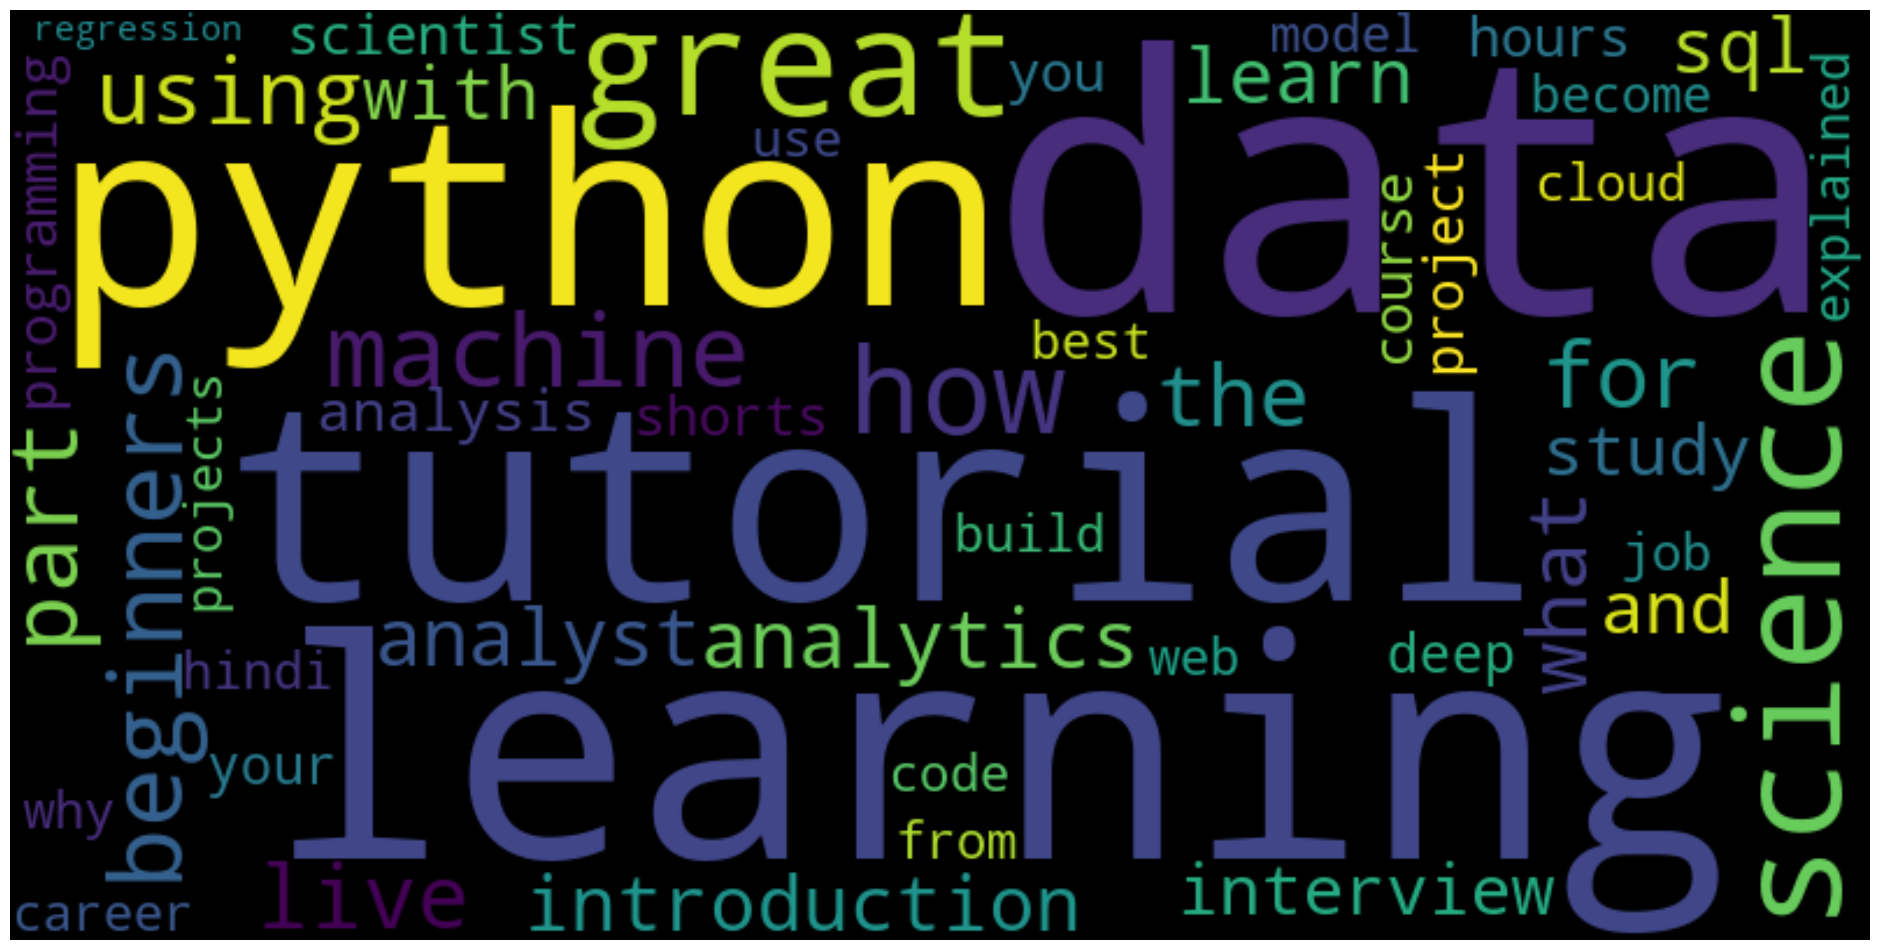

In [54]:
# create worldcloud 
wc = WordCloud(width=800, height=400, max_words=50).generate_from_frequencies(clean_dictionary)
plt.figure(figsize=(24,20))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.show()